In [103]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer ,ENGLISH_STOP_WORDS

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import re 
import nltk
from nltk.stem.porter import PorterStemmer

from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import PassiveAggressiveClassifier
from sklearn.linear_model import LogisticRegression


# Load Data

In [104]:
train = pd.read_csv('./First Data/training.csv')
test = pd.read_csv('./First Data/test.csv')
val =  pd.read_csv('./First Data/validation.csv')
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


### check the data


In [73]:
#label_dict = {0:'sad', 1:'happy', 2:'love', 3:'angry', 4:'fear', 5:'surprise'}
#train['emotion'] = train['label'].map(label_dict )
#test['emotion'] = test['label'].map(label_dict)
#val['emotion'] = val['label'].map(label_dict)
#train.head()

In [76]:
train.isnull().sum()

text     0
label    0
dtype: int64

In [77]:
test.isnull().sum()

text     0
label    0
dtype: int64

In [78]:
val.isnull().sum()

text     0
label    0
dtype: int64

# EDA

In [79]:
# see what is the destrbuition of emotions 
train.label.value_counts(normalize =True)

1    0.335125
0    0.291625
3    0.134937
4    0.121063
2    0.081500
5    0.035750
Name: label, dtype: float64

About 33% of the emotions is happy followed by sad and angry 


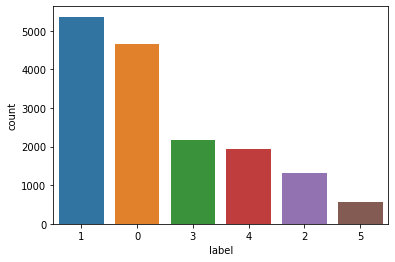

In [80]:
sns.countplot(train['label'],order = train['label'].value_counts(normalize=True).index)

Now i will add feature of the length of each sentiment to give my a better understand of the dataset 

In [81]:
train["length"] = [len(i) for i in train["text"]]
test["length"] = [len(i) for i in test["text"]]
val["length"] = [len(i) for i in val["text"]]
train['length'].value_counts()

71     155
69     153
50     153
52     145
74     141
      ... 
299      2
252      1
300      1
297      1
7        1
Name: length, Length: 292, dtype: int64

As we can see the long text is consists of 155 word and the least is 7 words 

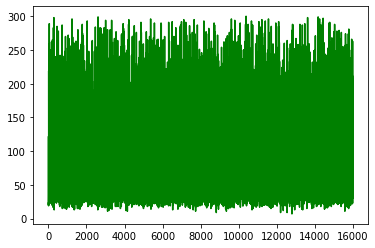

In [82]:
plt.plot(train["length"], color = "green")


### Make a wordcloud bag for the text of every emotion

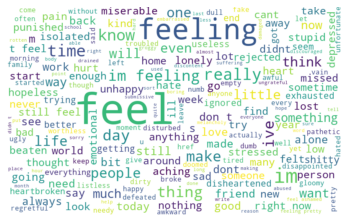

In [83]:
txt = ' '.join(text for text in train[train['label']==0]['text'])

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 200,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

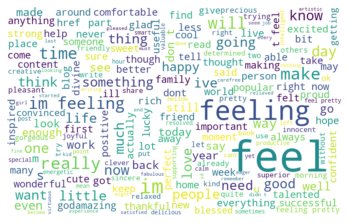

In [85]:
txt = ' '.join(text for text in train[train['label']==1]['text'])

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 200,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

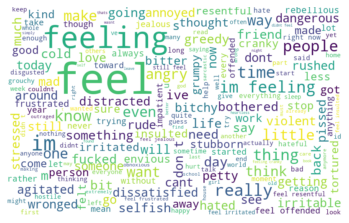

In [87]:
txt = ' '.join(text for text in train[train['label']==3]['text'])

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 200,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

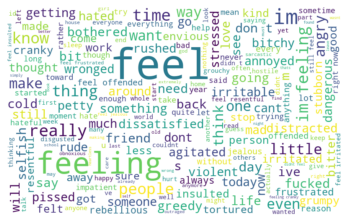

In [88]:
txt = ' '.join(text for text in train[train['label']==3]['text'])

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 200,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

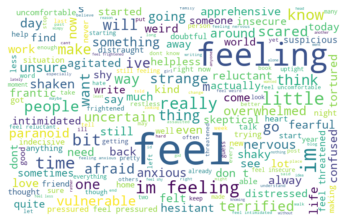

In [89]:
txt = ' '.join(text for text in train[train['label']==4]['text'])

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 200,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

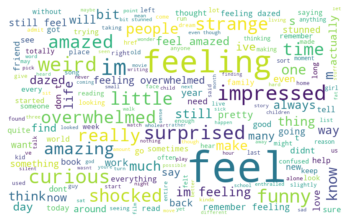

In [90]:
txt = ' '.join(text for text in train[train['label']==5]['text'])

wordcloud = WordCloud(
            background_color = 'white',
            max_font_size = 100,
            max_words = 200,
            width = 800,
            height = 500
            ).generate(txt)


plt.imshow(wordcloud,interpolation = 'bilinear')
plt.axis('off')
plt.show()

no way to convert the suprise into neutral 

# prepare the data for model 

1.Cleaning html tag¶




In [105]:
def clean_html(text):
    
    clean = re.compile('<.*?>')
    return re.sub(clean, '',text)
    
train['text']=train['text'].apply(clean_html)
test['text'] = test['text'].apply(clean_html)
val['text']=val['text'].apply(clean_html)

2- convert the text to lowercase

In [106]:
def convert_lower(text):
    return text.lower()

train['text']=train['text'].apply(convert_lower)
test['text'] = test['text'].apply(convert_lower)
val['text']=val['text'].apply(convert_lower)

3- remove special characters 

In [107]:
def remove_special(text):
        x=''
        for i in text:
            if i.isalnum():
                x=x+i
            else:
                x=x+' '
        return x

train['text']=train['text'].apply(remove_special)
test['text'] = test['text'].apply(remove_special)
val['text']=val['text'].apply(remove_special)

4- remove stopwords

In [108]:

def remove_stopwords(text):
    x=[]
    for i in text.split():
        
        if i not in stopwords.words('english'):
            x.append(i)
    y=x[:]
    x.clear()
    return y
train['text']=train['text'].apply(remove_stopwords)
test['text'] = test['text'].apply(remove_stopwords)
val['text']=val['text'].apply(remove_stopwords)

5- rejoin the text again

In [111]:
def join_back(list_input):
    return " ".join(list_input)
    

train['text']=train['text'].apply(join_back)
test['text'] = test['text'].apply(join_back)
val['text']=val['text'].apply(join_back)

6- Stemming the text 

In [112]:
ps= PorterStemmer()
y=[]

def stem_words(text):
    for i in text:
        y.append(ps.stem(i))
    z=y[:]
    y.clear()
    return z
train['text']=train['text'].apply(stem_words)
test['text'] = test['text'].apply(stem_words)
val['text']=val['text'].apply(stem_words)

7- rejoin the text in dataset

In [113]:
def joinback2(list_input):
    return "".join(list_input)
    


train['text']=train['text'].apply(joinback2)
test['text'] = test['text'].apply(joinback2)
val['text']=val['text'].apply(joinback2)

In [114]:
train

,text,label
0,didnt feel humiliated,0
1,go feeling hopeless damned hopeful around some...,0
2,im grabbing minute post feel greedy wrong,3
3,ever feeling nostalgic fireplace know still pr...,2
4,feeling grouchy,3
...,...,...
15995,brief time beanbag said anna feel like beaten,0
15996,turning feel pathetic still waiting tables sub...,0
15997,feel strong good overall,1
15998,feel like rude comment im glad,3


### Split data to prepare for model 

In [115]:
X=train['text']
y=train.label
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=0.3) 

### transfer the text to numerical features

In [116]:
vec = TfidfVectorizer(binary=True, use_idf=True)
X_train = vec.fit_transform(X_train) 
X_test = vec.transform(X_test)

### Start to test models

1- passive aggressive model

In [117]:
pac=PassiveAggressiveClassifier(max_iter=50)
pac.fit(X_train,y_train)

PassiveAggressiveClassifier(max_iter=50)

In [118]:
y_pred=pac.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')


Accuracy: 87.29%


2- logistic regression model 

In [119]:
log_reg = LogisticRegression(max_iter=50).fit(X_train, y_train)


/home/paula/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [120]:
y_predicted = log_reg.predict(X_test)
score=accuracy_score(y_test,y_predicted)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 85.5%


test the model 


In [121]:
log_reg.predict(X_test)

array([0, 0, 2, ..., 1, 1, 0])

In [122]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100,learning_rate=0.2)
model.fit(X_train, y_train)


[21:36:52] WARNING: /workspace/src/learner.cc:480: 
Parameters: { use_label_encoder } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, eval_metric='mlogloss',
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.2, max_delta_step=0,
              max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method='exact', use_label_encoder=False,
              validate_parameters=1, verbosity=None)

In [123]:
y_pred = model.predict(X_test)
score=accuracy_score(y_test,y_pred)
print(f'Accuracy: {round(score*100,2)}%')

Accuracy: 87.56%
